In [104]:
import pandas as pd
import numpy as npq
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from xgboost import XGBRegressor 
from sklearn.model_selection import train_test_split


In [ ]:
housing = fetch_california_housing()
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [20]:
housing_df['Price'] = housing.target
housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


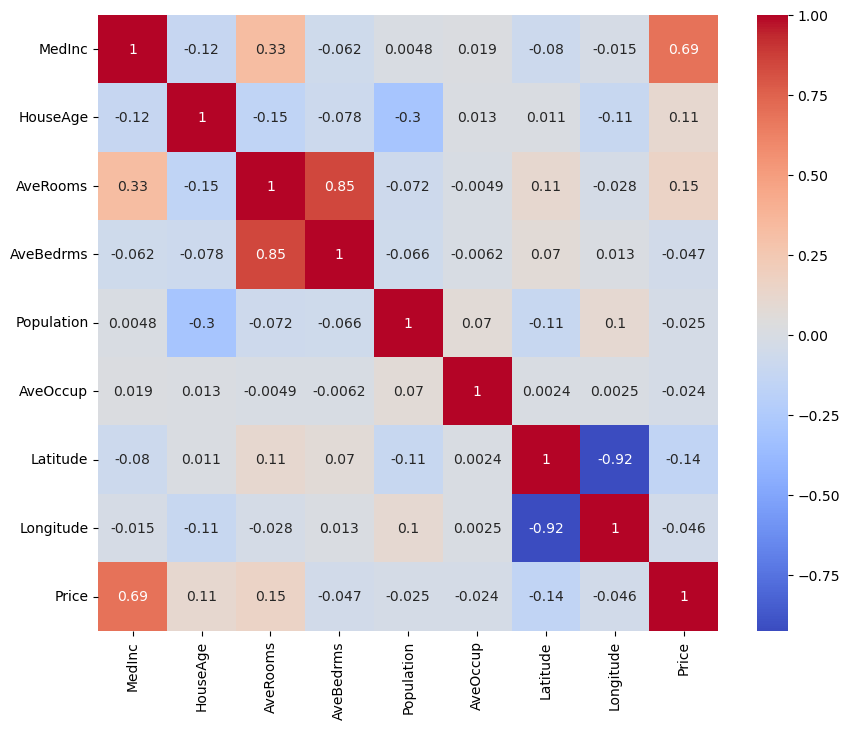

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(housing_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
housing_df=housing_df[housing_df['AveRooms']<10]
housing_df=housing_df[housing_df['Price']<5]

In [107]:
X=housing_df[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']]

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [105]:
model= XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=-1, random_state=42)
model.fit(X_train,y_train)
print("Model trained successfully.")

Model trained successfully.


In [108]:
y_pred=model.predict(X_test)
T=pd.DataFrame({'Thuc te':y_test,'Du doan':y_pred})
T.head()
T['Chenh lech'] = abs(T['Thuc te'] - T['Du doan'])
print(T.sort_values(by='Chenh lech').head())

       Thuc te   Du doan  Chenh lech
5920     1.498  1.497978    0.000022
1711     1.643  1.642728    0.000272
18474    2.269  2.269323    0.000323
13358    1.502  1.501675    0.000325
3327     1.000  1.000424    0.000424
